In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [2]:
df = pd.read_csv("../input/suicides-in-india/Suicides in India 2001-2012.csv")

In [3]:
df.shape

(237519, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe(include='object')

,State,Type_code,Type,Gender,Age_group
count,237519,237519,237519,237519,237519
unique,38,5,69,2,6
top,Madhya Pradesh,Causes,Others (Please Specify),Male,15-29
freq,6792,109200,7263,118879,45223


In [8]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


#### Percentage of suicides by each gender.

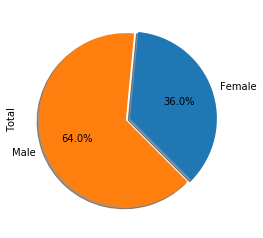

In [9]:
df.groupby(by='Gender')['Total'].sum().plot(kind='pie', explode=[0,0.05], autopct='%1.1f%%',startangle=-45, shadow=True)

### Males are almost twice in number than females.

### How suicides rates of male and female had been affected over the years.

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Total', hue='Gender', estimator='sum')
plt.title('Suicides by Year')

#### Based on total suicides in 2012, let's calculate how worse the situation is.

In [10]:
temp = df[df['Year']==2012]['Total'].sum() / (365*24*24)
print('Suicide per minute in 2012 : '+str(round(temp)))
del temp

Suicide per minute in 2012 : 6.0


### How the suicide numbers of male and females are distributed among the different states.

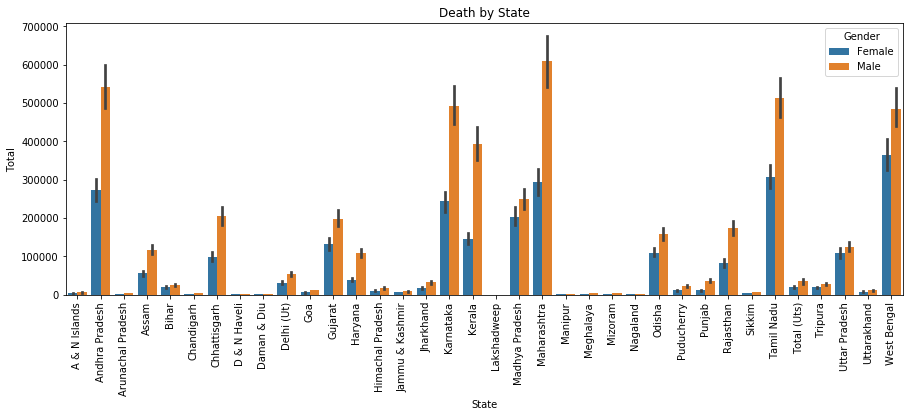

In [11]:
temp = df[~((df['State']=='Total (All India)') | (df['State']=='Total (States)'))]
plt.figure(figsize=(15,5))
sns.barplot(data = temp, x='State', y='Total', hue='Gender', estimator=np.sum)
plt.xticks(rotation=90)
plt.title('Death by State')
del temp

### Maharasthra, A.P., tamil nadu, West Bengal and Karnataka have highest number of suicides.
#### Southern side of india has high suicides than the northan side.

### Distribution of male and felame suicides over the years amongst the different states.

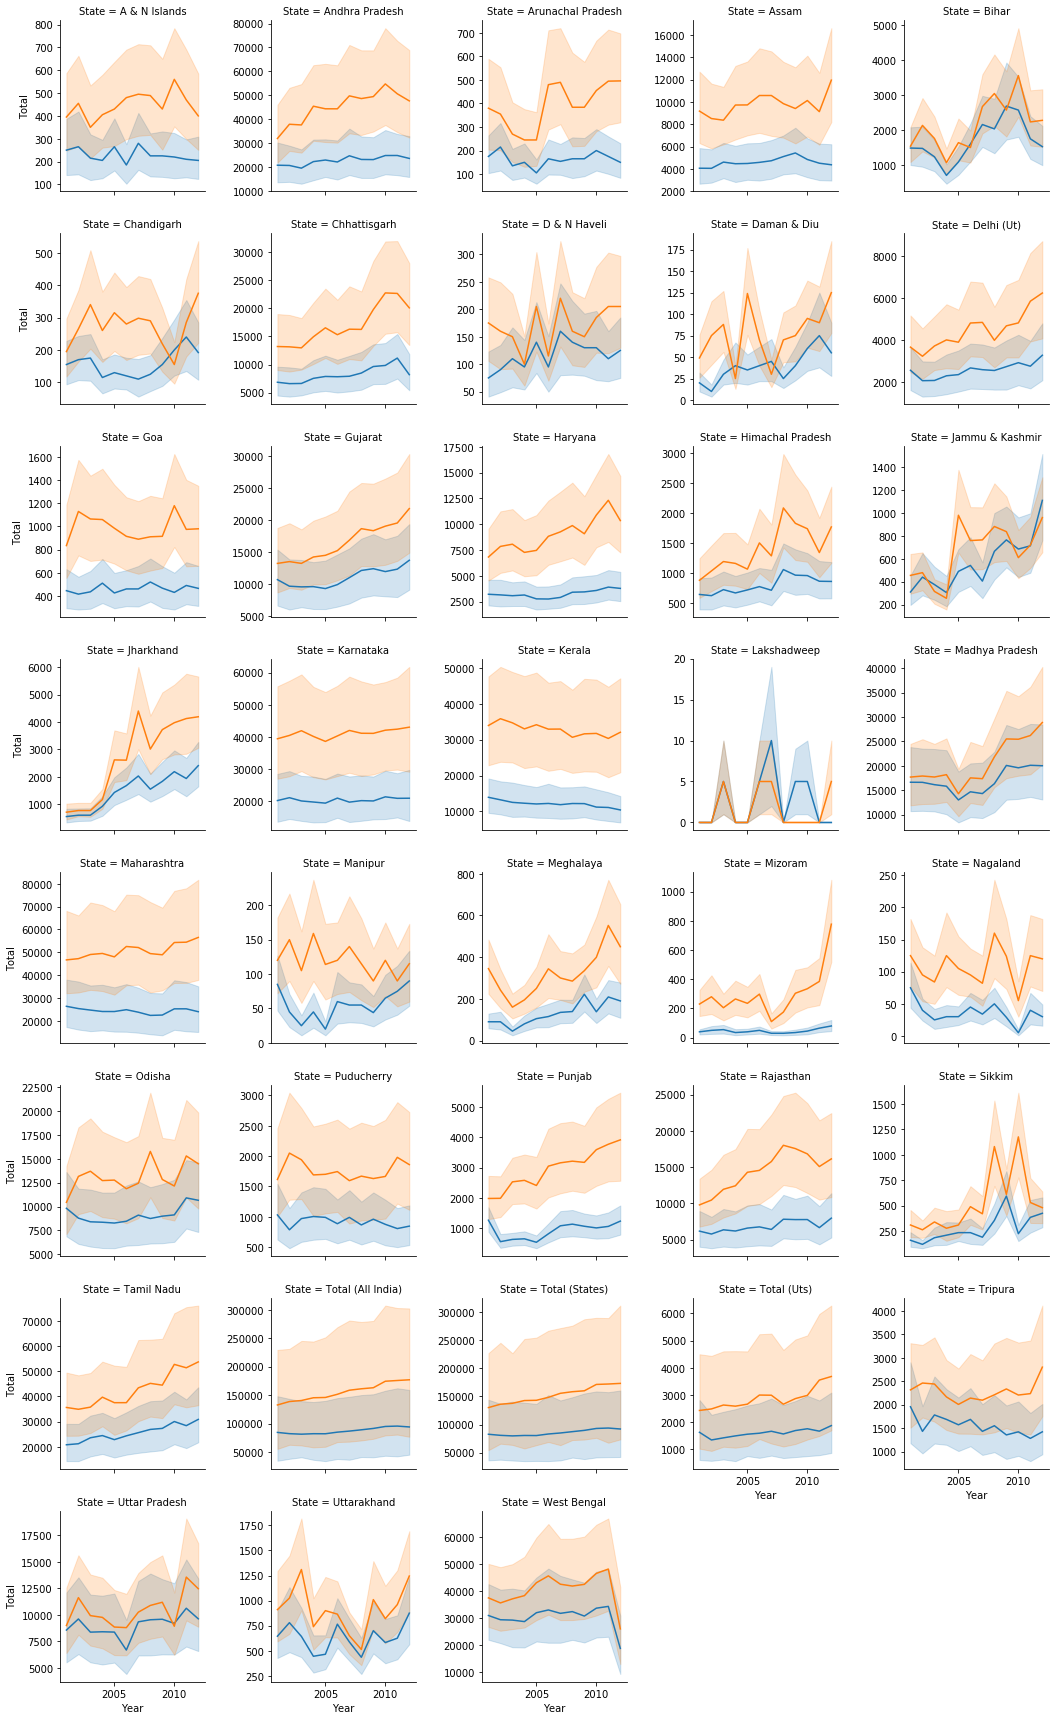

In [12]:
g = sns.FacetGrid(data=df, col='State', col_wrap=5, sharey=False)
g.map(sns.lineplot, 'Year', 'Total', 'Gender',  estimator='sum')
del g

### All the states have more male suicides than females. However, Lakshadeep has more female suicides than males.

### Distribution of male and female suicides amongst different age_groups.

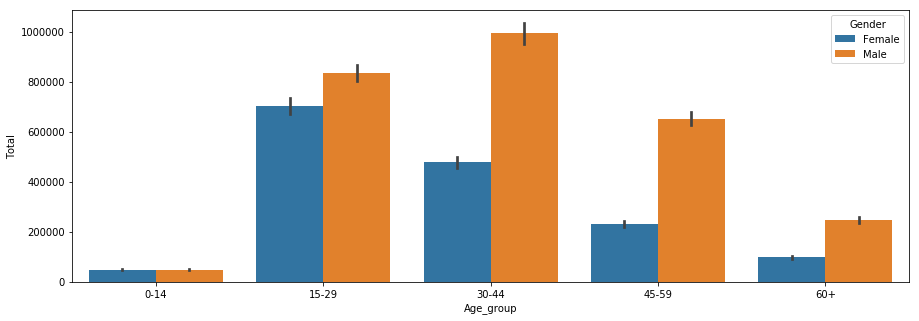

In [13]:
temp = df[ ~(df['Age_group'] == '0-100+')]
plt.figure(figsize=(15,5))
sns.barplot(data=temp, x='Age_group', y='Total', hue='Gender', estimator=np.sum)
del temp

#### Distribution of number of suicides amongst different age groups.

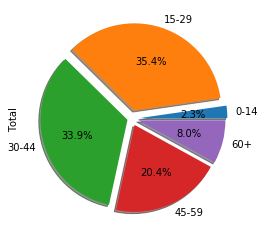

In [14]:
df[~(df['Age_group']=='0-100+')].groupby(by='Age_group')['Total'].sum().plot(kind='pie', autopct='%1.1f%%', shadow=True
                                                                            , explode=[0.1,0.1,0.05,0.08,0.08])

In [15]:
cause_df = df[df['Type_code']=='Causes']

eduction_status_df = df[df['Type_code']=='Education_Status']
means_adopted_df = df[df['Type_code']=='Means_adopted']
professional_profile_df = df[df['Type_code']=='Professional_Profile']
social_status_df = df[df['Type_code']=='Social_Status'] 

### Below are the top causes of suicides and the number of suicides caused by them.

Text(0.5, 1.0, 'Top Causes of Suicides')

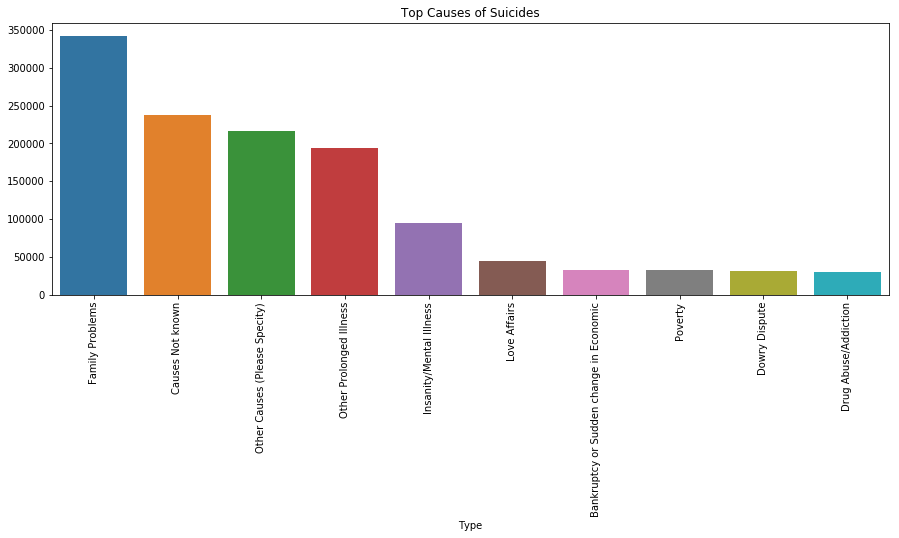

In [16]:
plt.figure(figsize=(15,5))
temp = cause_df.groupby(by='Type')['Total'].sum().sort_values(ascending=False).head(10)
sns.barplot(temp.index, temp.values)
plt.xticks(rotation=90)
plt.title('Top Causes of Suicides')

In [17]:
temp = cause_df.groupby(by=['Age_group','Type'])['Total'].sum().unstack().T
mode_temp = temp.max()

columns = temp.columns.to_list()

dic = {}
for i in range(len(temp.columns)):
    dic[columns[i]] =  temp.loc[temp.iloc[:,i]== mode_temp.iloc[i]].index[0]

age_cause = pd.DataFrame(pd.Series(dic), columns=['Cause'])

del temp, mode_temp, columns, dic

#### Major cause of suicides over different age groups.

In [18]:
age_cause

,Cause
0-14,Other Causes (Please Specity)
15-29,Family Problems
30-44,Family Problems
45-59,Family Problems
60+,Other Prolonged Illness


### distribution of Number of suicides by different education status.

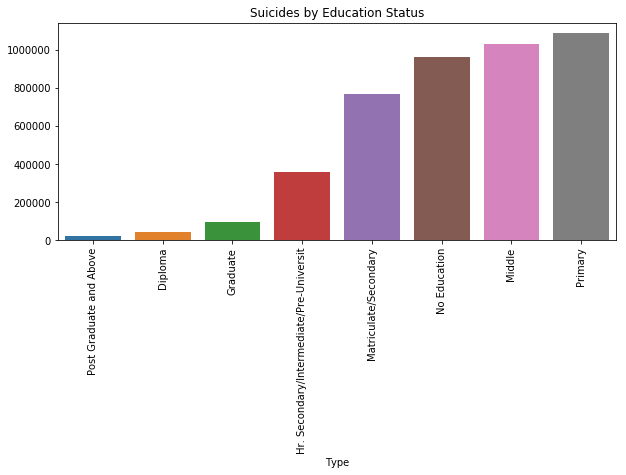

In [19]:
plt.figure(figsize=(10,4))
temp = eduction_status_df.groupby(by='Type')['Total'].sum().sort_values()
sns.barplot(temp.index, temp.values)
plt.xticks(rotation=90)
plt.title('Suicides by Education Status')
del temp

### Prople with higher education tend to suicide less.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

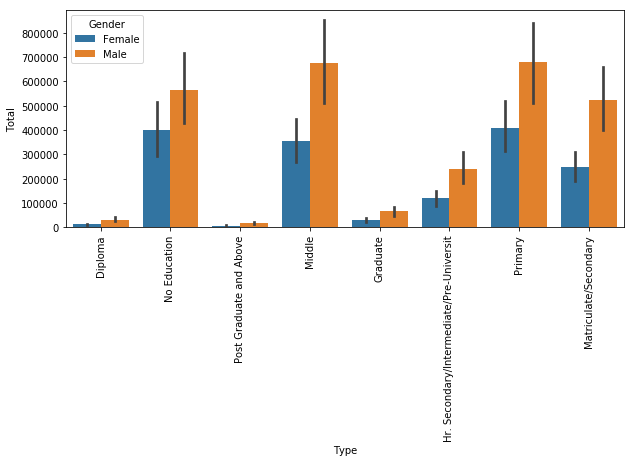

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(data=eduction_status_df, x='Type', y='Total', estimator=np.sum, hue='Gender')
plt.xticks(rotation=90)

### Different means of suicide and number of suicides by those means.

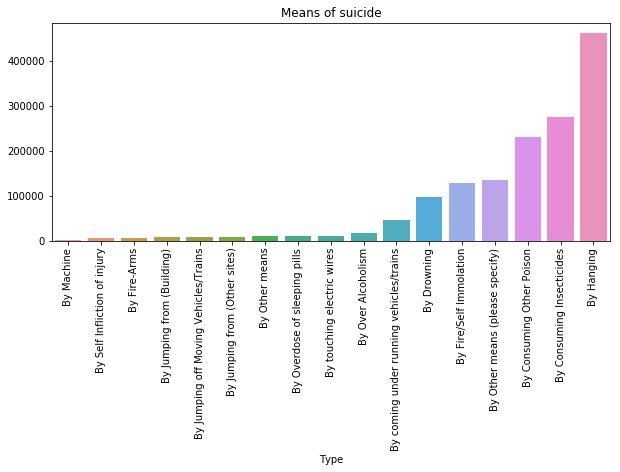

In [21]:
plt.figure(figsize=(10,4))
temp = means_adopted_df.groupby(by='Type')['Total'].sum().sort_values()
sns.barplot(temp.index, temp.values)
plt.xticks(rotation=90)
plt.title('Means of suicide')
del temp

#### Hanging is the most popular amongst the various means of suicide. That can be beause, it is easily accessable.

### number of suicides by different professional status.

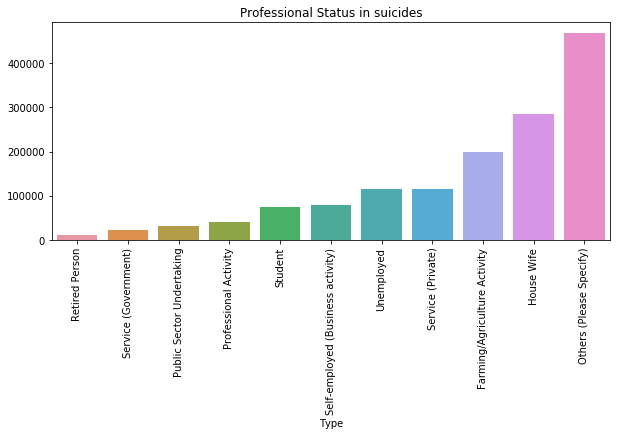

In [22]:
plt.figure(figsize=(10,4))
temp = professional_profile_df.groupby(by='Type')['Total'].sum().sort_values()
sns.barplot(temp.index, temp.values)
plt.xticks(rotation=90)
plt.title('Professional Status in suicides')
del temp

Text(0.5, 1.0, 'Distribution of male and female suicides amongst Different professions')

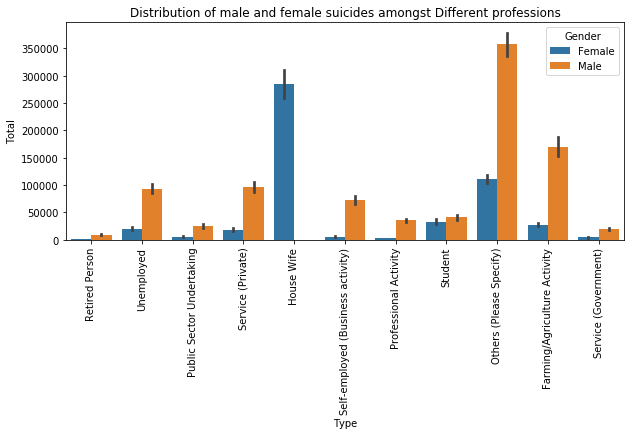

In [23]:
plt.figure(figsize=(10,4))
sns.barplot(data=professional_profile_df, x='Type', y='Total', hue='Gender', estimator=np.sum)
plt.xticks(rotation=90)
plt.title('Distribution of male and female suicides amongst Different professions')

### Number of suicides by different social status.

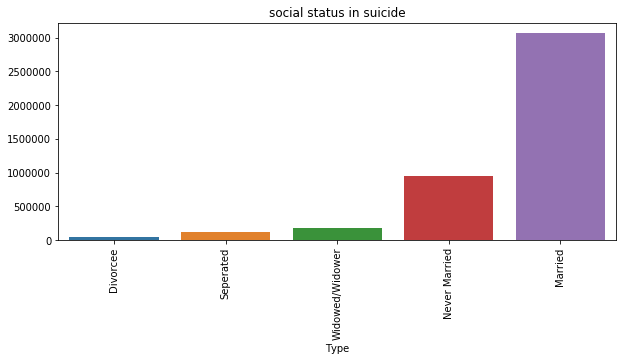

In [24]:
plt.figure(figsize=(10,4))
temp = social_status_df.groupby(by='Type')['Total'].sum().sort_values()
sns.barplot(temp.index, temp.values)
plt.xticks(rotation=90)
plt.title('social status in suicide')
del temp

Text(0.5, 1.0, 'Distribution of male and female suicides amongst various social status')

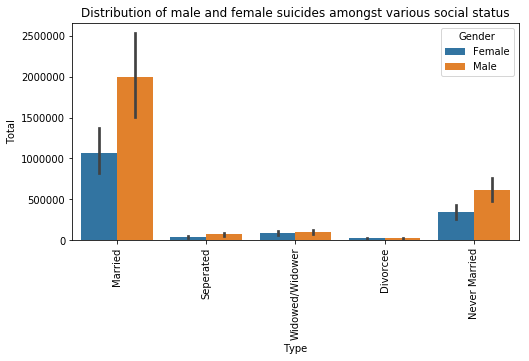

In [25]:
plt.figure(figsize=(8,4))
sns.barplot(data=social_status_df, x='Type', y='Total', hue='Gender', estimator=np.sum)
plt.xticks(rotation=90)
plt.title('Distribution of male and female suicides amongst various social status')